In [1]:
# Import Packages
import pandas as pd
import nltk

In [2]:
# Read file and return data frame
def get_dataframe(filePath):
    extension = filePath.split('.')[-1].lower()
    if (extension == 'csv'):
        df = pd.read_csv(filePath)
        return df
    else:
        return DataFrame()


In [3]:
train_df = get_dataframe('twitter_train.csv')
test_df = get_dataframe('test_tweets_anuFYb8.csv')

In [4]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Text Preprocessing

In [6]:
#Remove Id column 
train_df.drop('id',axis=1,inplace=True)
# test_df.drop('id',axis=1,inplace=True)

In [7]:
# Map the short abbriviation word to full word
CONTRACTION_MAP = {
"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have",
"couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not",
"hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have",
"he'll": "he will","he'll've": "he he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will",
"how's": "how is","I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am",
"I've": "I have","i'd": "i would","i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have",
"isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [8]:
train_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
import numpy as np
import re
train_df['tweet'] = np.vectorize(expand_contractions)(train_df['tweet'])
test_df['tweet'] = np.vectorize(expand_contractions)(test_df['tweet'])

In [11]:
train_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i cannot u...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [13]:
# Function which accept data_text and pattern and remove the find pattern from data_text
def remove_pattern_from_string(data_text,pattern):
    import re
    all_text_match_pattern = re.findall(pattern,data_text)
    for text in all_text_match_pattern:
        data_text = re.sub(text,' ',data_text)
    return data_text

In [14]:
# In Tweet there is @User text which won't give some Useful information so remove all the @user substring
import numpy as np
train_df['clean_tweet'] = np.vectorize(remove_pattern_from_string)(train_df['tweet'],'@[\w]*')
test_df['clean_tweet'] = np.vectorize(remove_pattern_from_string)(test_df['tweet'],'@[\w]*')

In [15]:
train_df.head(10)

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,0,@user @user thanks for #lyft credit i cannot u...,thanks for #lyft credit i cannot use cause...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i am it is so #...,welcome here ! i am it is so #gr8 !


In [16]:
test_df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see t...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [17]:
# Remove all character which are not aplha numerice
# train_df['clean_tweet'] = train_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
# Remove # and check model Performance
train_df['clean_tweet'] = train_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
train_df['clean_tweet'] = train_df['clean_tweet'].str.replace("  ", " ")

test_df['clean_tweet'] = test_df['clean_tweet'].str.replace("[^a-zA-Z]", " ")
test_df['clean_tweet'] = test_df['clean_tweet'].str.replace("  ", " ")

In [18]:
train_df['clean_tweet'].head()

0      when a father is dysfunctional and is so sel...
1      thanks for #lyft credit i cannot use cause t...
2                                  bihday your majesty
3    #model  i love u take with u all the time in u...
4                  factsguide society now  #motivation
Name: clean_tweet, dtype: object

In [19]:
# Removing Short Word (assume threshold length of short word is 3)
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if len(word)>3]))
test_df['clean_tweet'] = test_df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if len(word)>3]))

In [20]:
train_df['clean_tweet'].head(10)

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cannot cause they offer wh...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
5    huge fare talking before they leave chaos disp...
6                               camping tomorrow danny
7    next school year year exams cannot think about...
8    love land #allin #cavs #champions #cleveland #...
9                                         welcome here
Name: clean_tweet, dtype: object

In [21]:
# User Porter's Stemmer to stem the word or choffedd of the last suffixes and take consideration of rootword without
#Morphological Analysis
from nltk.stem import PorterStemmer


In [22]:
stemmer = PorterStemmer()

In [23]:
# Function to stemming the word using stemmer
def word_tockenize(text):
    words = text.split(' ') # Tockenise the sentence into words
    return ' '.join([stemmer.stem(word) for word in words])

In [24]:
# Function to lemitizing word
def lamitise_word(text):
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()
    return wnl.lemmatize(text)

## Text Analysis

In [25]:
# FUnction to plot the words which are repeated most time in text using Text Cloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
def plot_words_in_wordcloud(data):
    wordcloud = WordCloud(width=800,height=700,random_state=21,max_font_size=110).generate(data)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

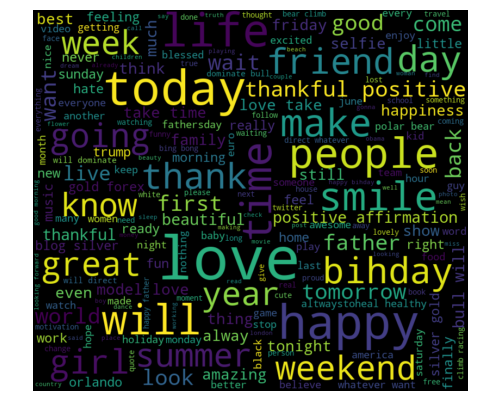

In [26]:
all_word_clean_word = ' '.join(text for text in train_df['clean_tweet'])
plot_words_in_wordcloud(all_word_clean_word)

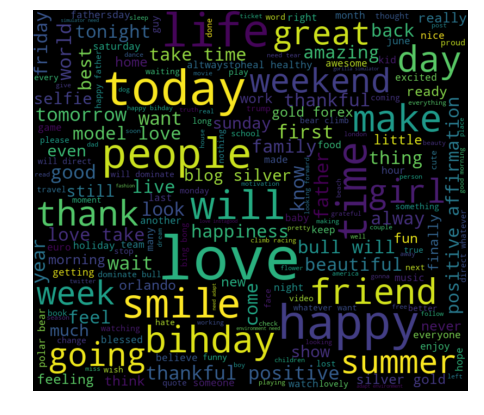

In [27]:
# Plot the word having Postive Sense
all_word_positive = ' '.join(text for text in train_df['clean_tweet'][train_df['label']==0])
plot_words_in_wordcloud(all_word_positive)

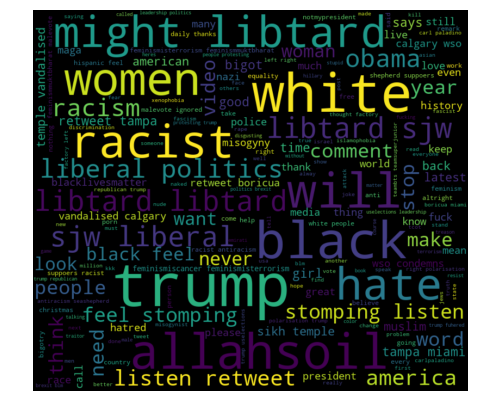

In [28]:
# Plot the  word having Negative sense
all_word_negative = ' '.join(text for text in train_df['clean_tweet'][train_df['label']==1])
plot_words_in_wordcloud(all_word_negative)

In [29]:
# collect hashtag
def get_hashtag_list(x):
    hashtag = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtag.append(ht)
    return hashtag

In [30]:
# get Hashtag for normal word
hastag_normal = get_hashtag_list(train_df['clean_tweet'][train_df['label']==0])
#get Hasgtag for racist word
hash_tag_negative = get_hashtag_list(train_df['clean_tweet'][train_df['label']==1])
#un nesting list
hastag_normal = sum(hastag_normal,[])
hash_tag_negative = sum(hash_tag_negative,[])

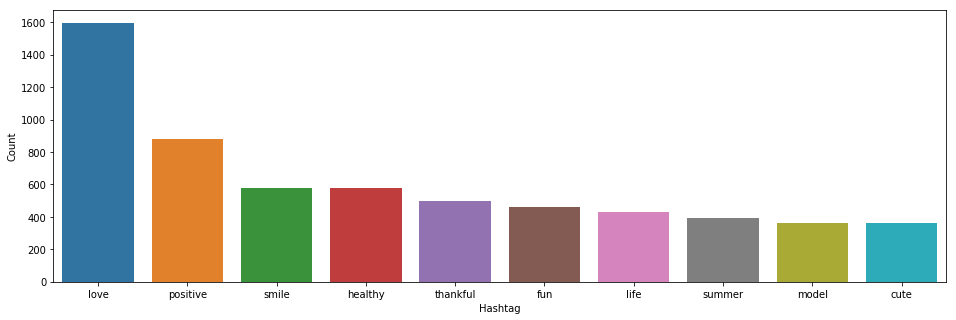

In [31]:
# Plot the hash tag word with Frequency 
import nltk
import seaborn as sns
a = nltk.FreqDist(hastag_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

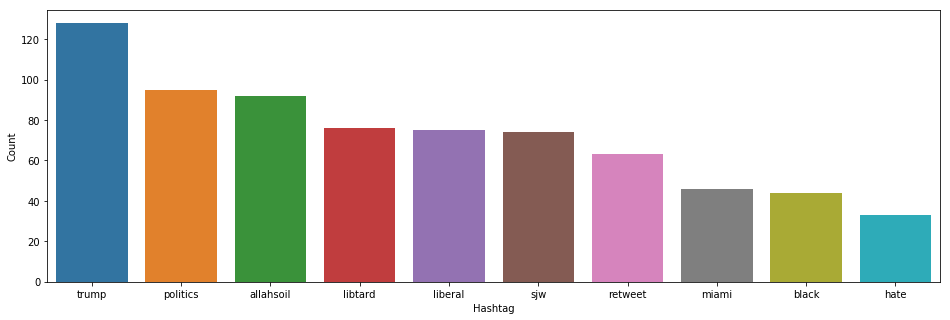

In [32]:
# Show the Plot of negative word used with Hash Tag
a = nltk.FreqDist(hash_tag_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Create Bags of word Vector

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
# Seperate Feature and target
X = train_df['clean_tweet']
Y = train_df['label']

In [35]:
# Use Count Vectorizer 
# count_vectorizer = CountVectorizer(stop_words='english',analyzer=lamitise_word) # Use Custome Analyser Stem Word list
# count_vectorizer_matrix = count_vectorizer.fit_transform(X)
count_vectorizer = CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1,2)) # Use Custome Analyser Stem Word list
count_vectorizer.fit(X)
count_vectorizer_matrix = count_vectorizer.transform(X)
print(count_vectorizer_matrix.shape, count_vectorizer_matrix[0,:].mean())

(31962, 164630) 7.896495170989493e-05


In [36]:
# Use TfIdf To generate Bag of words
tf_idf = TfidfVectorizer(stop_words='english')
tf_idf.fit(X)
tf_idf_matrix = tf_idf.transform(X)
print(tf_idf_matrix.shape, tf_idf_matrix[0,:].mean())

(31962, 36166) 7.162447927858597e-05


In [37]:
# Use LOgistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix,Y,random_state=0,test_size=0.3)

In [39]:
lrg_clf = LogisticRegression(C=30, dual=True)
lrg_clf.fit(X_train,y_train)

prediction = lrg_clf.predict_proba(X_test)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int)
print('F score is {}'.format(f1_score(y_test, prediction_int)))
print('accuracy  is {}'.format(accuracy_score(y_test, prediction_int)))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F score is 0.6828844483058211
accuracy  is 0.9619355511523621


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
report = classification_report(y_test, prediction_int)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8954
           1       0.76      0.62      0.68       635

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.87      0.80      0.83      9589
weighted avg       0.96      0.96      0.96      9589



In [91]:
test_df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone birds movie here
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your acne altwaystoheal healthy...
3,31966,is the hp and the cursed child book up for res...,cursed child book reservations already where w...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday amazing hilarious nephew ahmir uncle da...


In [92]:
test_df.dtypes

id              int64
tweet          object
clean_tweet    object
dtype: object

In [101]:
# SUbmission File Code 
# Seperate Feature and target
X_test_df = test_df['clean_tweet']
tf_idf = TfidfVectorizer(stop_words='english')
tf_idf.fit(X_test_df)
tf_idf_matrix = tf_idf.transform(X_test_df)
tf_idf_matrix.shape
# pred_test = lrg_clf.predict_proba(tf_idf_matrix).astype(np.int)[:,1] >= 0.3
# submission_csv = pd.read_csv('sample_submission_gfvA5FD.csv')
# submission_csv['label']=pred_test
# submission_csv['id']=test['id']
# pd.DataFrame(submission_csv, columns=['id','label']).to_csv('submission.csv')

(17197, 23715)

## Logestic Regression Hyper Parameter Tuning 

In [40]:
from sklearn.model_selection import GridSearchCV

In [52]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5,30,100]
param_grid = dict(dual=dual,max_iter=max_iter,penalty=["l2"],C=C)

In [53]:
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1)

In [54]:
grid_result = grid.fit(tf_idf_matrix, Y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.961360 using {'C': 30, 'dual': True, 'max_iter': 100, 'penalty': 'l2'}
